# Lab: Build Neural Networks via Pytorch

The purpose of this assignment is to learn how to build neural networks using PyTorch, focusing on both the theoretical and practical aspects of the process.

One key step involves passing the output of a regression model through the Sigmoid function. This operation transforms the raw output (often called the logit) into a probability value between 0 and 1, which represents the likelihood of an observation belonging to the positive class. 

This step is particularly important in binary classification tasks, as it allows us to interpret the model's predictions in probabilistic terms and enables subsequent evaluation using metrics such as accuracy or binary cross-entropy loss.

## Imports
<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torchsummary import summary
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_regression, make_circles, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

## Neural Network Classification
<hr>

### 1. Binary Classification

We will build a binary classification model using PyTorch. The output of the regression model will be passed through the Sigmoid function to convert it into a value between 0 and 1, representing the probability that an observation belongs to the positive class.

#### PyTorch Tensor

Please convert your input data, X (features) and y (labels), into PyTorch tensors so they can be used with PyTorch models.

X_t and y_t are created as tensors with the data type torch.float32, which is required for most machine learning tasks in PyTorch.

In [2]:
X, y = make_circles(n_samples=300, factor=0.5, noise=0.1, random_state=2020)


# Your code for tensor
X_t = torch.tensor(X, dtype=torch.float32) #your code
y_t = torch.tensor(y, dtype=torch.float32) #your code

X_t, y_t


(tensor([[-3.4758e-01, -4.7947e-01],
         [-8.8957e-02,  3.9925e-01],
         [-1.9660e-02,  4.9685e-01],
         [-2.5765e-01,  3.3594e-01],
         [-1.1273e+00, -1.1658e-01],
         [ 3.2519e-01, -4.5880e-01],
         [-1.4268e-01, -1.0405e+00],
         [ 4.6046e-01, -1.3879e-01],
         [-2.8761e-01, -3.6240e-01],
         [-1.0996e-01, -4.3669e-01],
         [ 2.6716e-01,  1.0061e+00],
         [ 3.1496e-01, -3.6893e-01],
         [ 2.0831e-01, -3.3605e-01],
         [ 6.2875e-01,  7.1543e-01],
         [-3.5772e-01, -9.5776e-01],
         [-9.7364e-01,  1.7513e-01],
         [ 6.1805e-01,  6.6860e-01],
         [-5.1280e-01,  1.5998e-01],
         [ 8.5531e-01,  3.0783e-01],
         [ 9.6832e-01, -3.3099e-02],
         [ 5.1479e-01,  5.2271e-01],
         [-3.8217e-01,  5.3500e-01],
         [-9.1944e-01,  5.4978e-01],
         [-1.2963e-01, -4.7992e-01],
         [ 2.4431e-04, -6.4223e-01],
         [ 4.6739e-01, -1.9820e-01],
         [-3.7315e-02,  5.3860e-01],
 

#### TensorDataset
Use PyTorch's TensorDataset and DataLoader to prepare the dataset for training, including batching and shuffling.

Requirements:

Combine X_t and y_t into a dataset using TensorDataset.

Use DataLoader to create batches of data for training. The batch size should be specified by the variable 45.
Enable shuffle=True in the DataLoader to randomize the order of data for each epoch.

In [3]:
# Create dataloader
# Your code for TensorDataset and dataloader
batchSize = 45
dataset = TensorDataset(X_t, y_t)

dataloader = DataLoader(dataset, batch_size=batchSize, shuffle=True)# your code

for batch in dataloader:
    X_batch, y_batch = batch
    # Print only the first batch
    print("Batch X shape:", X_batch.shape)
    print("Batch y shape:", y_batch.shape)
    break

Batch X shape: torch.Size([45, 2])
Batch y shape: torch.Size([45])


#### Visualize your circular dataset

Visualize your circular dataset with the following requirements:

- The figure size should be set to 5×5.
- Data points with y = 0 should be marked in blue, and those with y = 1 should be marked in red.
- Both the x-axis and y-axis labels should have a font size of 14.

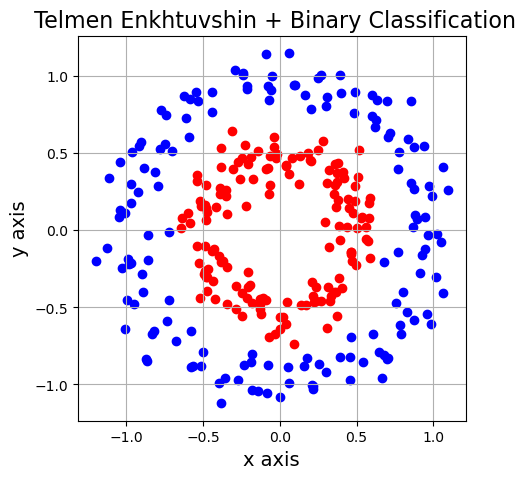

In [6]:

# Plot each class
# Your code plot with scatter
plt.figure(figsize=(5, 5))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
# Add Label and title
plt.title(" Telmen Enkhtuvshin + Binary Classification", fontsize=16)
plt.xlabel("x axis", fontsize=14)
plt.ylabel("y axis", fontsize=14)
# Your code set graph axises
plt.grid()
plt.show()

In [7]:
# Plot each class
# Example results

We're going to start using `ReLU` as our activation function(s) and `Adam` as our optimizer because these are what are currently, commonly used in practice. We are doing classification now so we'll need to use log loss (binary cross entropy) as our loss function:

$$f(w) = \sum_{x,y \in D} -y log(\hat{y}) - (1-y)log(1-\hat{y})$$

#### Create Neural Network 

Implement a neural network class for binary classification using PyTorch's nn.Module.

- Create a fully connected layer that maps the input features to the hidden layer.
- Use Relu as activation
- Create another fully connected layer
- Use Sigmoid


In [13]:

class binaryClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = nn.Sequential(
            # Your code 
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        out = self.main(x)
        return out

#### Build trainer

Implement a simple training wrapper for a PyTorch network that handles the forward pass, backpropagation, and parameter updates for multiple epochs.

Training Process:

Epoch Loop: 
- Iterate over the specified number of epochs.

Batch Loop:
- Iterate over batches of X and y from the dataloader.
- Clear the gradients using optimizer.zero_grad().
- Perform a forward pass:
- Use the model to compute predictions (y_hat).
- Flatten the output to match the expected shape if necessary.
- Calculate the loss using criterion(y_hat, y).
- Perform backpropagation with loss to compute gradients.
- Update model parameters using optimizer.step().
- Accumulate the loss for the batch into a running total.

Logging:
- At the end of each epoch, compute and print the average loss over all batches if verbose is True.

In [42]:
def trainer(model, criterion, optimizer, dataloader, epochs=5, verbose=True):
    # You may review the ipynb file from Week 6
    # Your code
    
    # List to store the loss for each epoch
    epoch_losses = []
    
    for epoch in range(epochs):
        losses = 0
        for X, y in dataloader:
            optimizer.zero_grad()      # you code   # Clear gradients w.r.t. parameters
            y_hat = model(X)           # you code   # Forward pass to get output
            y_hat = y_hat.flatten()
            loss = criterion(y_hat, y) # you code   # Calculate loss
            loss.backward()            # you code   # Getting gradients w.r.t. parameters
            optimizer.step()           # you code   # Update parameters
            losses += loss.item()      # you code   # Add loss for this batch to running total
        # Average loss for this epoch
        avg_loss = losses / len(dataloader)
        # Store the loss
        epoch_losses.append(avg_loss)
        if verbose: print(f"epoch: {epoch + 1}, loss: {losses / len(dataloader):.4f}")
    return epoch_losses

In PyTorch, the binary cross entropy loss criterion is `torch.nn.BCELoss`. The formula expects a "probability" which is why we add a Sigmoid function to the end of out network.

In [43]:
LEARNING_RATE = 0.1
criterion = torch.nn.BCELoss() #your code  # loss function - binary cross entropy loss
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE) #your code  # optimization algorithm - Adam

Let's train the model:

In [44]:
# Your code
# set your mode with 2 input layers, 6 hidden layers, and 1 output layers via binaryClassifier class
model = binaryClassifier(2, 6, 1)# your code 

#### Activation functions

We're going to using `ReLU` as our activation function(s) and `Adam` as our optimizer because these are what are currently, commonly used in practice. We are doing classification now so we'll need to use log loss (binary cross entropy) as our loss function:

$$f(w) = \sum_{x,y \in D} -y log(\hat{y}) - (1-y)log(1-\hat{y})$$

In PyTorch, the binary cross entropy loss criterion is `torch.nn.BCELoss`. The formula expects a "probability" which is why we add a Sigmoid function to the end of out network.

In [45]:
LEARNING_RATE = 0.1
criterion = torch.nn.BCELoss() # loss function
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)  # optimization algorithm

In [46]:
# build your trainer funtion with model, criterion, optimizer, dataloader, epochs=30, verbose=True
# Your code
epoch_losses = trainer(model, criterion, optimizer, dataloader, epochs=30, verbose=True)


epoch: 1, loss: 0.6329
epoch: 2, loss: 0.5009
epoch: 3, loss: 0.3509
epoch: 4, loss: 0.2607
epoch: 5, loss: 0.1990
epoch: 6, loss: 0.1583
epoch: 7, loss: 0.1151
epoch: 8, loss: 0.0920
epoch: 9, loss: 0.0757
epoch: 10, loss: 0.0762
epoch: 11, loss: 0.0723
epoch: 12, loss: 0.0607
epoch: 13, loss: 0.0472
epoch: 14, loss: 0.0484
epoch: 15, loss: 0.0428
epoch: 16, loss: 0.0363
epoch: 17, loss: 0.0386
epoch: 18, loss: 0.0327
epoch: 19, loss: 0.0303
epoch: 20, loss: 0.0286
epoch: 21, loss: 0.0276
epoch: 22, loss: 0.0275
epoch: 23, loss: 0.0233
epoch: 24, loss: 0.0220
epoch: 25, loss: 0.0215
epoch: 26, loss: 0.0225
epoch: 27, loss: 0.0217
epoch: 28, loss: 0.0190
epoch: 29, loss: 0.0214
epoch: 30, loss: 0.0217


#### Visualize your results 

#### Part 1: Loss Curve

- Please plot the loss curve during training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

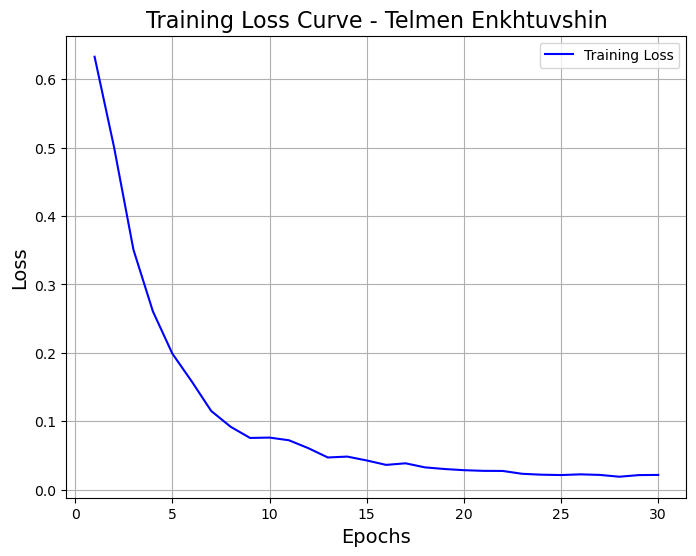

In [47]:
# Your code 
plt.figure(figsize=(8, 6))
# Plot loss curve
plt.plot(range(1, 31), epoch_losses, label='Training Loss', color='blue')
# Title with name
plt.title("Training Loss Curve - Telmen Enkhtuvshin", fontsize=16)
# X-axis label
plt.xlabel("Epochs", fontsize=14)
# Y-axis label
plt.ylabel("Loss", fontsize=14)
# Show the legend
plt.legend()
# Show grid
plt.grid()
plt.show()

### Part 2: Actual and predicted data 

- Please plot the Actual and predicted data after training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

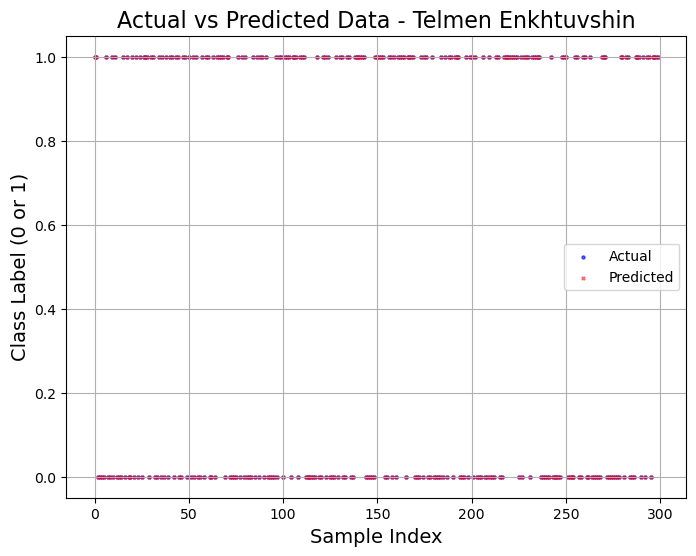

In [50]:
# Your code

# Set model to evaluation mode
model.eval()
    
actual = []
predicted = []

# Disable gradient computation
with torch.no_grad():
    for X, y in dataloader:
        # Get predictions
        y_hat = model(X)
        # Apply sigmoid and flatten
#         y_hat = torch.sigmoid(y_hat).squeeze()
        # Convert probabilities to binary labels
        y_pred = (y_hat > 0.5).float()

        # Store actual labels
        actual.extend(y.numpy())
        # Store predicted labels
        predicted.extend(y_pred.numpy())

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(range(len(actual)), actual, label="Actual", color="blue", s=5, alpha=0.6)
plt.scatter(range(len(predicted)), predicted, label="Predicted", color="red", s=5, alpha=0.6, marker='x')

# Graph settings
plt.title("Actual vs Predicted Data - Telmen Enkhtuvshin", fontsize=16)
plt.xlabel("Sample Index", fontsize=14)
plt.ylabel("Class Label (0 or 1)", fontsize=14)
# Show legend
plt.legend()
# Show grid
plt.grid()
plt.show()

To be clear, our model is just outputting some number between -1 and +1 (we are applying Sigmoid in the model), so:
- To get the probabilities we would need to pass them through a Sigmoid;
- To get classes, we can apply some threshold (usually 0.5) to this probability.

For example, we would expect the point (0,0) to have a high probability and the point (-1,-1) to have a low probability:

In [51]:
prediction = model(X_t)#your code
print(prediction)

tensor([[9.9539e-01],
        [9.9996e-01],
        [9.9955e-01],
        [9.9992e-01],
        [1.1714e-07],
        [9.9850e-01],
        [1.3966e-04],
        [9.9729e-01],
        [9.9985e-01],
        [9.9995e-01],
        [1.8198e-04],
        [9.9973e-01],
        [9.9999e-01],
        [7.7197e-03],
        [1.9310e-04],
        [5.5873e-06],
        [2.8718e-02],
        [9.9310e-01],
        [2.5202e-02],
        [2.4133e-04],
        [7.9866e-01],
        [8.9716e-01],
        [4.1069e-06],
        [9.9982e-01],
        [9.7400e-01],
        [9.9439e-01],
        [9.9839e-01],
        [9.9864e-01],
        [9.9999e-01],
        [1.4087e-04],
        [9.9221e-01],
        [2.3215e-02],
        [9.9083e-01],
        [3.3063e-04],
        [7.0216e-01],
        [9.9259e-01],
        [1.0009e-03],
        [2.0789e-05],
        [1.1700e-02],
        [9.9937e-01],
        [9.9894e-01],
        [9.9997e-01],
        [1.3005e-04],
        [9.9852e-01],
        [4.1639e-05],
        [6

In [52]:
probability = torch.sigmoid(prediction)# you code
print(probability)

tensor([[0.7302],
        [0.7311],
        [0.7310],
        [0.7310],
        [0.5000],
        [0.7308],
        [0.5000],
        [0.7305],
        [0.7310],
        [0.7310],
        [0.5000],
        [0.7310],
        [0.7311],
        [0.5019],
        [0.5000],
        [0.5000],
        [0.5072],
        [0.7297],
        [0.5063],
        [0.5001],
        [0.6897],
        [0.7104],
        [0.5000],
        [0.7310],
        [0.7259],
        [0.7300],
        [0.7307],
        [0.7308],
        [0.7311],
        [0.5000],
        [0.7295],
        [0.5058],
        [0.7293],
        [0.5001],
        [0.6687],
        [0.7296],
        [0.5003],
        [0.5000],
        [0.5029],
        [0.7309],
        [0.7308],
        [0.7311],
        [0.5000],
        [0.7308],
        [0.5000],
        [0.5002],
        [0.5000],
        [0.7308],
        [0.5000],
        [0.5001],
        [0.5000],
        [0.5035],
        [0.5009],
        [0.7308],
        [0.5110],
        [0

In [53]:
classes = np.where(probability > 0.5, 1, 0)
print(classes)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]


### 2. Multiclass Classification

For multiclass classification, we'll need the softmax function:

$$\sigma(\vec{z})_i=\frac{e^{z_i}}{\sum_{j=1}^{K}e^{z_j}}$$

It basically outputs probabilities for each class we wish to predict, and they all sum to 1. 

`torch.nn.CrossEntropyLoss` is a loss that combines a softmax with cross entropy loss. 

Let's try a 4-class classification problem using the following network:


In [97]:
X, y = make_blobs(n_samples=200, centers=4, center_box=(-1.2, 1.2), cluster_std=[0.15, 0.15, 0.15, 0.15], random_state=12345)
X_t = torch.tensor(X, dtype=torch.float32) #your code
y_t = torch.tensor(y, dtype=torch.long) #your code

# Create dataloader
dataset = TensorDataset(X_t, y_t) #your code
dataloader = DataLoader(dataset, batch_size=16, shuffle=True) #your code

In [98]:
class multiClassifier(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = torch.nn.Sequential(
            torch.nn.Linear(input_size, hidden_size),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        out = self.main(x)
        return out

#### Visualize your circular dataset

Visualize your circular dataset with the following requirements:

- The figure size should be set to 5×5.
- Both the x-axis and y-axis labels should have a font size of 14.

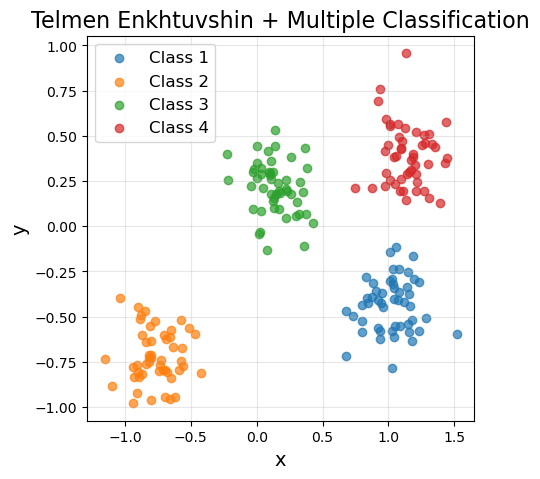

In [99]:
# Plot each class
# Your code plot with scatter
# Scatter plot each class separately
plt.figure(figsize=(5, 5))
plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class 1", alpha=0.7)
plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class 2", alpha=0.7)
plt.scatter(X[y == 2, 0], X[y == 2, 1], label="Class 3", alpha=0.7)
plt.scatter(X[y == 3, 0], X[y == 3, 1], label="Class 4", alpha=0.7)
# Add Label and title
plt.title("Telmen Enkhtuvshin + Multiple Classification", fontsize=16)
# Your code 
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Let's train this model:

In [100]:
# model with 2 input layers, 6 hidden layers, and 4 output layers via multiClassifier class
# Your code 
model_2 = multiClassifier(2, 6, 4) #your code

# Your code 
criterion = torch.nn.CrossEntropyLoss() # loss function with CrossEntropyLoss
optimizer = optim.Adam(model_2.parameters(), lr=0.2)# optimization algorithm - Adam lr=0.2

# Initialize accuracy tracking list
accuracy_list = []

for epoch in range(10):
    losses = 0
    correct = 0
    total = 0
    
    for X_batch, y_batch in dataloader:
        optimizer.zero_grad()              #your code    # Clear gradients w.r.t. parameters
        y_hat = model_2(X_batch)           #your code    # Forward pass to get output
        loss = criterion(y_hat, y_batch)   #your code    # Calculate loss
        loss.backward()                    #your code    # Getting gradients w.r.t. parameters
        optimizer.step()                   #your code    # Update parameters
        losses += loss.item()              #your code    # Add loss for this batch to running total
        
        # Calculate accuracy
        _, predicted = torch.max(y_hat, 1)  # Get the class with the highest score
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()
    
    # Calculate average loss and accuracy for the epoch
    accuracy = 100 * correct / total
    accuracy_list.append(accuracy)
    
    print(f"epoch: {epoch + 1}, loss: {losses / len(dataloader):.4f}, Accuracy: {accuracy:.2f}%")

epoch: 1, loss: 0.6792, Accuracy: 66.00%
epoch: 2, loss: 0.0316, Accuracy: 100.00%
epoch: 3, loss: 0.0193, Accuracy: 99.50%
epoch: 4, loss: 0.0048, Accuracy: 100.00%
epoch: 5, loss: 0.0088, Accuracy: 99.50%
epoch: 6, loss: 0.0006, Accuracy: 100.00%
epoch: 7, loss: 0.0003, Accuracy: 100.00%
epoch: 8, loss: 0.0002, Accuracy: 100.00%
epoch: 9, loss: 0.0002, Accuracy: 100.00%
epoch: 10, loss: 0.0001, Accuracy: 100.00%


#### Visualize your results 

### Part 3: Accuracy Curve for 4 classes

- Please plot the Accuracy Curve during training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

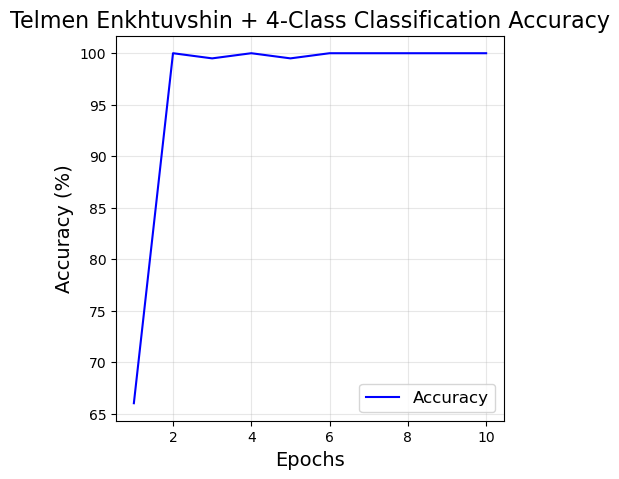

In [101]:
# Your code
# Plot the accuracy curve
plt.figure(figsize=(5, 5))
plt.plot(range(1, 11), accuracy_list, label='Accuracy', color='blue')
plt.title("Telmen Enkhtuvshin + 4-Class Classification Accuracy", fontsize=16)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

### Part 4: Actual and predicted data for classes

- Please plot the Actual and predicted data after training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

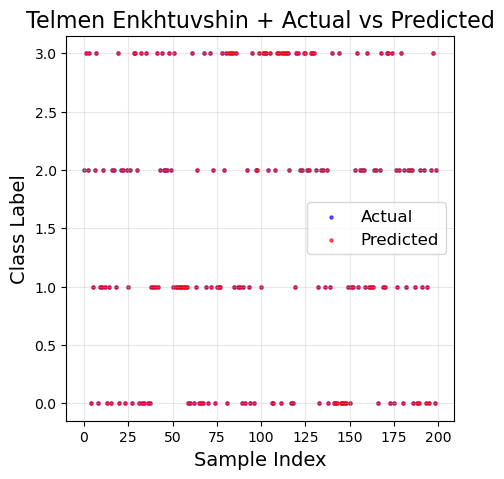

In [106]:
# Your code
# Get actual and predicted data
y_pred = []
y_true = []

# No need to compute gradients during evaluation
with torch.no_grad():
    for X_batch, y_batch in dataloader:
        # Forward pass to get output
        y_hat = model_2(X_batch)
        
        # Get predicted class labels (using torch.argmax for multiclass)
        _, predicted = torch.max(y_hat, 1)
        
        # Collect actual and predicted labels
        # Convert to CPU and numpy
        y_pred.extend(predicted.cpu().numpy()) 
        y_true.extend(y_batch.cpu().numpy())

# Plot the actual and predicted data
plt.figure(figsize=(5, 5))

# Plot actual data (for reference)
plt.scatter(range(len(y_true)), y_true, label='Actual', alpha=0.6, color='blue', s=5)

# Plot predicted data
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', alpha=0.6, color='red', s=5)

# Add title and labels
plt.title("Telmen Enkhtuvshin + Actual vs Predicted", fontsize=16)
plt.xlabel("Sample Index", fontsize=14)
plt.ylabel("Class Label", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()